### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import warnings
warnings.filterwarnings('ignore')

### Loading The Dataset

In [2]:
df = load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df['age'] = df['age'].fillna(np.mean(df['age']))
df.drop(['deck'],axis = 1,inplace = True)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [8]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
df['age'] = df['age'].astype(int)

In [10]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<Axes: xlabel='sex', ylabel='age'>

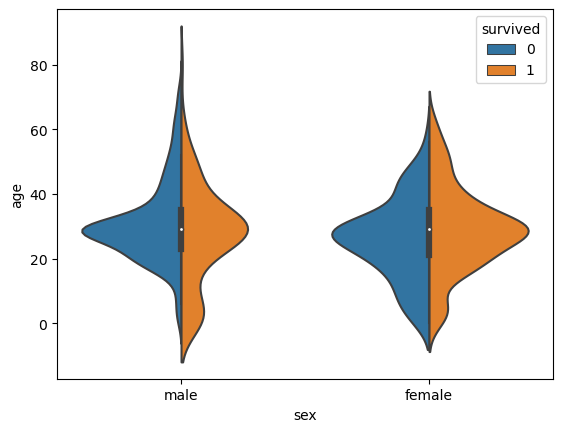

In [11]:
sns.violinplot(x ="sex", y ="age", hue ="survived",data = df, split = True)

Text(0.5, 1.0, 'Embarked Count')

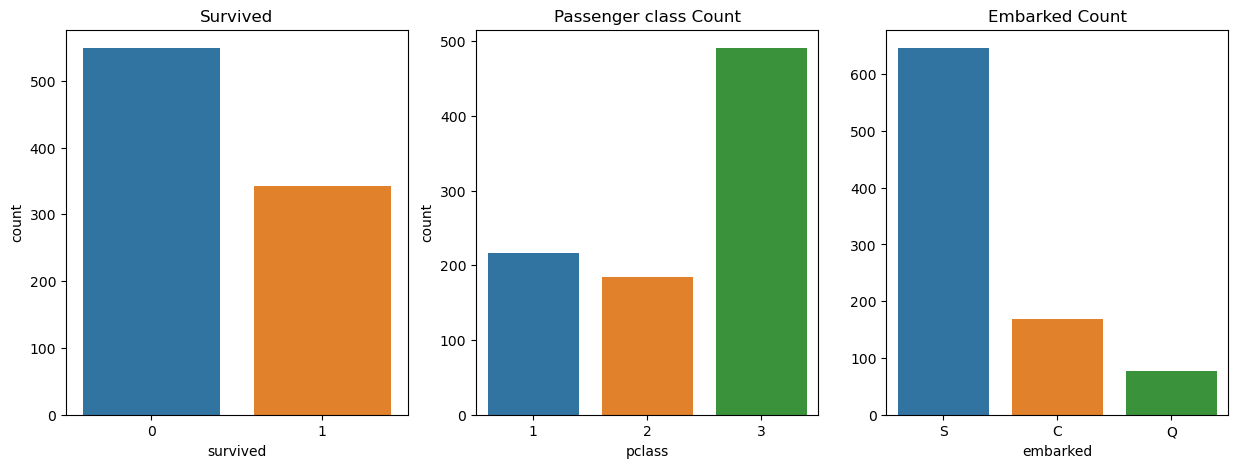

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='survived')
plt.title('Survived')

# Subplot 2
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='pclass')
plt.title('Passenger class Count')

# Subplot 3
plt.subplot(1, 3, 3)
embarked_counts = df['embarked'].value_counts()
sns.barplot(x=embarked_counts.index, y=embarked_counts.values)
plt.title('Embarked Count')

<Axes: xlabel='age', ylabel='Density'>

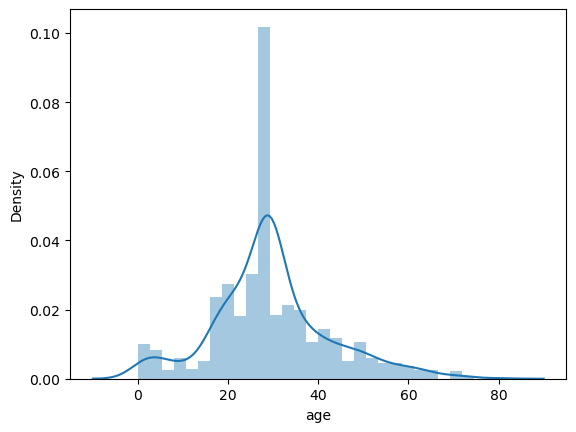

In [13]:
sns.distplot(df['age'])

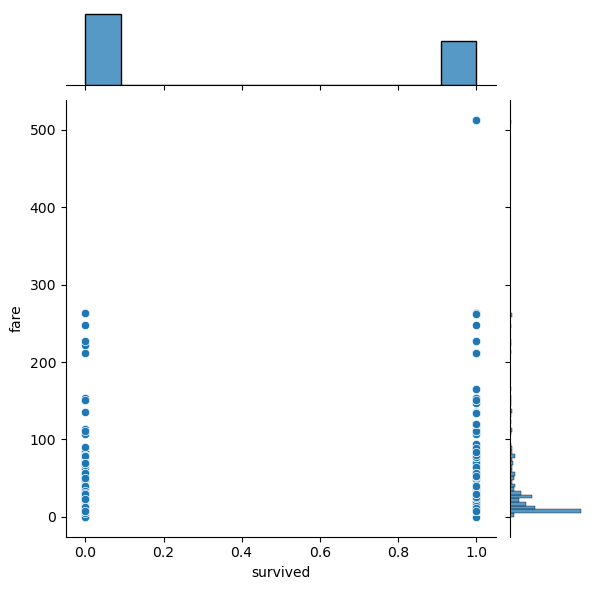

In [14]:
sns.jointplot(x = "survived", y = "fare", kind = "scatter", data = df)

<Figure size 1500x1000 with 0 Axes>

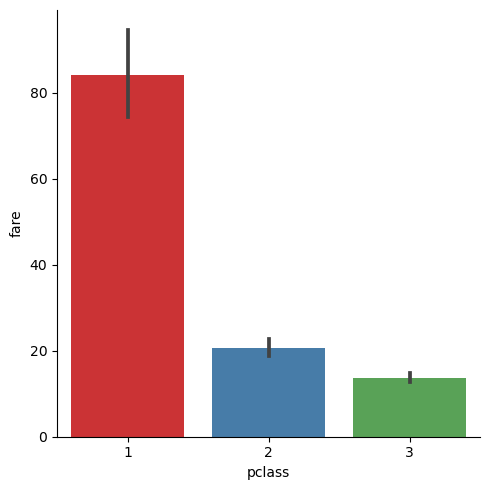

In [15]:
plt.figure(figsize=(15, 10))
sns.catplot(x='pclass', y='fare', data=df, kind='bar', palette='Set1')

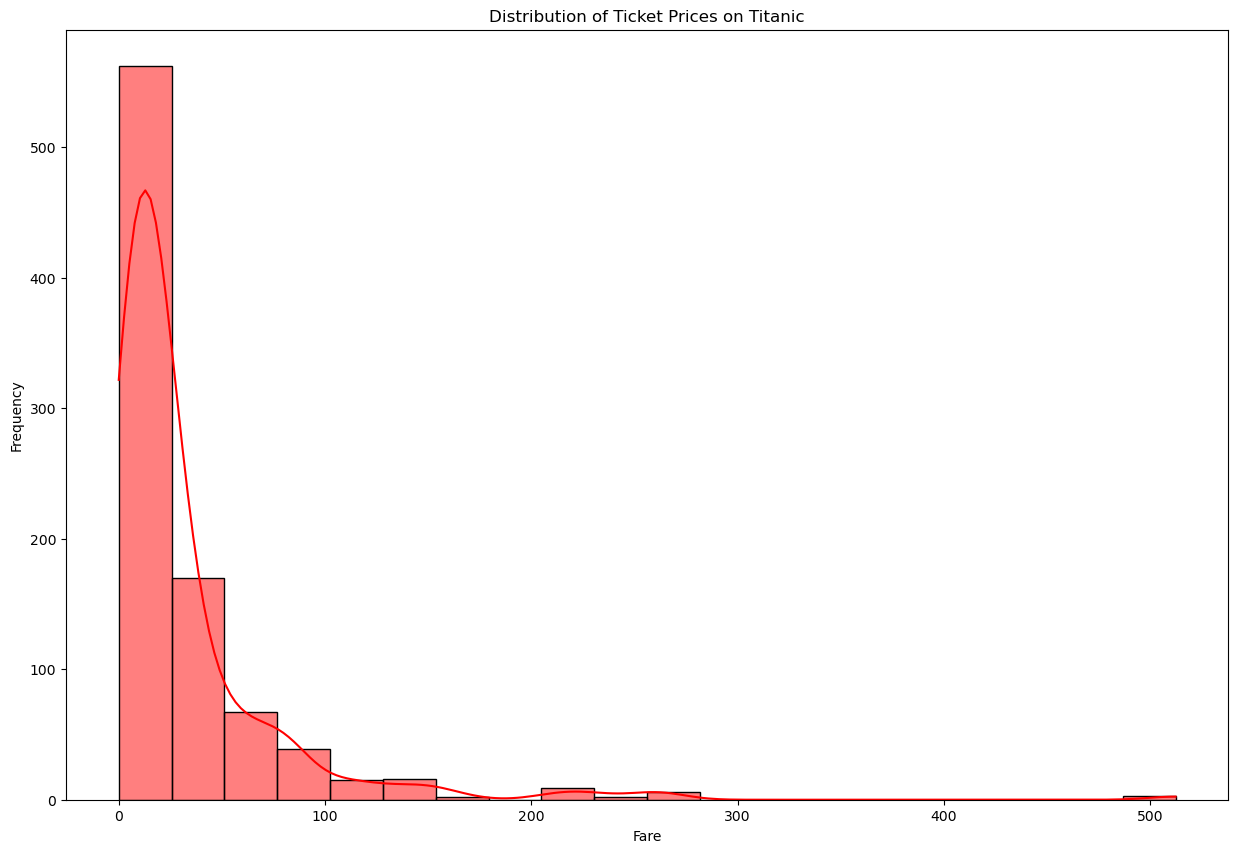

In [16]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='fare', bins=20, kde=True, color='red')
plt.title('Distribution of Ticket Prices on Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()